In [8]:
pip install pyLDAvis

   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.6 MB ? eta -:--:--
   ------------ --------------------------- 0.8/2.6 MB 2.4 MB/s eta 0:00:01
   -------------------- ------------------- 1.3/2.6 MB 2.5 MB/s eta 0:00:01
   ---------------------------- ----------- 1.8/2.6 MB 2.5 MB/s eta 0:00:01
   ------------------------------------ --- 2.4/2.6 MB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to C:\Users\A S U
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\A S U
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\A S U
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Total documents: 11096

📈 Coherence Score (c_v): 0.6157

🧠 Topics Discovered by LDA Model:

Topic 1:  key, use, encrypt, chip, db, system, inform, clipper, secur, program
Topic 2:  stephanopoulo, presid, russian, game, new, team, year, turkey, white, april
Topic 3:  would, peopl, one, govern, say, know, think, go, like, right
Topic 4:  q, n, x, e, k, c, p, f, bh, r


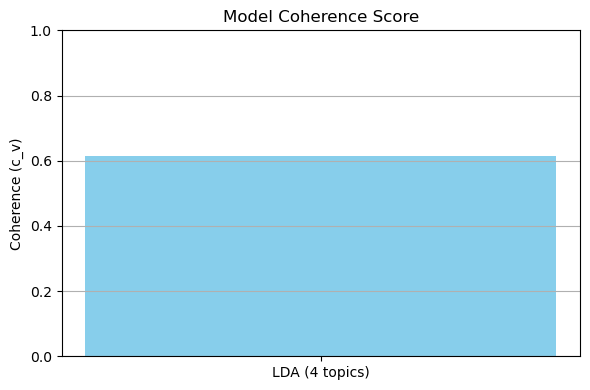

In [13]:
# Muhammad Asif bin Ridzuan
# Student ID: SW01082401
# Lab Assignment 3 - Topic Modeling

# ------------------------------
# Step 1: Import Necessary Libraries
# ------------------------------
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import CoherenceModel, LdaModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import nltk
import matplotlib.pyplot as plt
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
import warnings
warnings.filterwarnings('ignore')

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# ------------------------------
# Step 2: Read the Dataset
# ------------------------------
df = pd.read_csv('news_dataset.csv')
df = df[['text']]
df.dropna(inplace=True)
print(f"Total documents: {len(df)}")

# ------------------------------
# Step 3: Text Preprocessing
# ------------------------------
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    tokens = [stemmer.stem(word) for word in tokens]
    return tokens

df['tokens'] = df['text'].apply(preprocess)

# ------------------------------
# Step 4: Prepare Dictionary and Corpus
# ------------------------------
dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

# ------------------------------
# Step 5: Train LDA Model
# ------------------------------
lda_model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=4,
                     random_state=42,
                     update_every=1,
                     chunksize=100,
                     passes=10,
                     alpha='auto',
                     per_word_topics=True)

# ------------------------------
# Step 6: Evaluate with Coherence Score
# ------------------------------
coherence_model = CoherenceModel(model=lda_model, texts=df['tokens'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"\n📈 Coherence Score (c_v): {coherence_score:.4f}\n")

# ------------------------------
# Step 7: Display Topics Nicely
# ------------------------------
print("🧠 Topics Discovered by LDA Model:\n")
topics = lda_model.show_topics(num_topics=4, num_words=10, formatted=False)
for i, topic in topics:
    print(f"Topic {i + 1}: ", ", ".join([word for word, _ in topic]))

# ------------------------------
# Optional: Visualize Topic Distribution per Document
# ------------------------------
# Create a bar plot to visualize the coherence score
plt.figure(figsize=(6, 4))
plt.bar(['LDA (4 topics)'], [coherence_score], color='skyblue')
plt.title('Model Coherence Score')
plt.ylabel('Coherence (c_v)')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# ------------------------------
# Interpretation of Coherence Score
# ------------------------------

Interpretation of Coherence Score:

The LDA model produced a coherence score of 0.6157, which gives us a general idea of how meaningful and related the topics are. Coherence scores range from 0 to 1, and the closer the score is to 1, the better the quality of the topics. A score above 0.6 is usually considered decent, especially for text data that hasn’t been manually labeled or pre-categorized. So in this case, the topics generated by the model are fairly coherent — the keywords in each topic make sense together and likely represent real themes in the news articles. While it’s not a perfect score, it shows that the model is doing a good job at uncovering underlying patterns in the text.